#### Using the Query Engine
##### Running the Query Engine
Now let's ask some questions using this dataset.

#### 使用查询引擎
##### 运行查询引擎
现在让我们使用此数据集提出一些问题。

In [4]:
! pip install  graphrag  

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/9b/b9/2608b3e7fac0cd8f86477497c7d757f9ff5b9f338f3cd9068770a4e5637d/graphrag-0.3.6-py3-none-any.whl (389 kB)


## Since the platform defaults to searching, use scripts to close the configuration
## 由于平台默认搜索使用脚本关闭配置

### Restart the environment after running
### 运行后重启环境

In [1]:
 
import os
import sys
import re

def find_graphrag_package():
    """找到graphrag包的安装路径"""
    try:
        import graphrag
        package_path = os.path.dirname(graphrag.__file__)
        return package_path
    except ImportError:
        print("graphrag包没有安装。")
        sys.exit(1)

 
 

# 第一步：找到graphrag包的路径
package_path = find_graphrag_package()
print(f"graphrag包的路径: {package_path}")

# 第二步：找到openai.py文件 
openai_file_path = os.path.join(package_path, 'query', 'llm', 'oai', 'openai.py')

if os.path.exists(openai_file_path):
    print(f"找到文件: {openai_file_path}")
    !cp fix_openai.py $openai_file_path
    
else:
    print(f"未找到openai.py文件: {openai_file_path}")
    sys.exit(1)
! cat $openai_file_path

# 第二步：找到chat_openai.py文件 
chat_openai_file_path = os.path.join(package_path, 'query', 'llm', 'oai', 'chat_openai.py')

if os.path.exists(chat_openai_file_path):
    print(f"找到文件: {chat_openai_file_path}")
    !cp fix_chat_openai.py $chat_openai_file_path
    
else:
    print(f"未找到chat_openai.py文件: {chat_openai_file_path}")
    sys.exit(1)
! cat $chat_openai_file_path

graphrag包的路径: /media/gpt4-pdf-chatbot-langchain/pyenv-glm-cookbook/lib/python3.10/site-packages/graphrag
找到文件: /media/gpt4-pdf-chatbot-langchain/pyenv-glm-cookbook/lib/python3.10/site-packages/graphrag/query/llm/oai/openai.py

# Copyright (c) 2024 Microsoft Corporation.
# Licensed under the MIT License

"""OpenAI Wrappers for Orchestration."""

import logging
from typing import Any

from tenacity import (
    AsyncRetrying,
    RetryError,
    Retrying,
    retry_if_exception_type,
    stop_after_attempt,
    wait_exponential_jitter,
)

from graphrag.query.llm.base import BaseLLMCallback
from graphrag.query.llm.oai.base import OpenAILLMImpl
from graphrag.query.llm.oai.typing import (
    OPENAI_RETRY_ERROR_TYPES,
    OpenaiApiType,
)

log = logging.getLogger(__name__)


class OpenAI(OpenAILLMImpl):
    """Wrapper for OpenAI Completion models."""

    def __init__(
        self,
        api_key: str,
        model: str,
        deployment_name: str | None = None,
        api_base: str |


#### Here you need to set the platform's api_key, which can be obtained from `https://open.bigmodel.cn/`
#### 这里需要设置平台的api_key,从`https://open.bigmodel.cn/`获取


In [1]:
import pandas as pd
import os
from pathlib import Path


os.environ["GRAPHRAG_LLM_API_KEY"] = 'key'

os.environ["GRAPHRAG_LLM_API_BASE"] = 'https://open.bigmodel.cn/api/paas/v4'

os.environ["GRAPHRAG_EMBEDDING_API_BASE"] = 'https://open.bigmodel.cn/api/paas/v4'

os.environ["GRAPHRAG_EMBEDDING_API_KEY"] = 'key'

os.environ["GRAPHRAG_API_KEY"] = 'key'



#### Here are some examples of using global search to ask advanced questions:
#### 以下是使用全局搜索提出高级问题的示例：

In [2]:
!python -m graphrag.query --root ./coplay_analysis_graph --method global "这里面有什么基准么"



creating llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_chat", 'model': 'glm-4-airx', 'max_tokens': 4000, 'temperature': 0.1, 'top_p': 0.99, 'n': 1, 'request_timeout': 180.0, 'api_base': 'https://open.bigmodel.cn/api/paas/v4', 'api_version': None, 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': None, 'model_supports_json': False, 'tokens_per_minute': 150000, 'requests_per_minute': 500, 'max_retries': 10, 'max_retry_wait': 10.0, 'sleep_on_rate_limit_recommendation': True, 'concurrent_requests': 25}

SUCCESS: Global Search Response:
在提供的分析师报告中，提到了一个重要的基准，即**ROLEBench基准**。以下是关于该基准的详细信息：

ROLEBench基准是社区的核心实体，主要用于角色评分以及few-shot对话工程实验的评估工具 [Data: Entities (6), Relationships (5, 6, 7)]。该基准在角色描述和流行语中引入了Role元素，从而对角色进行综合评价 [Data: Reports (0)]。

这意味着ROLEBench基准在角色研究和对话系统评估中扮演着关键角色，它不仅提供了角色评分的标准，还支持对角色描述和流行语中Role元素的分析，有助于更全面地理解和评价角色。


以下是使用本地搜索询问有关特定角色的更具体问题的示例：

In [3]:
!python -m graphrag.query --root ./coplay_analysis_graph --method local "这里面有什么基准么"





INFO: Vector Store Args: {}
[2024-09-29T14:01:37Z WARN  lance::dataset] No existing dataset at /media/gpt4-pdf-chatbot-langchain/glm-cookbook/demo/graphrag/coplay_analysis_graph/output/20240929-215737/artifacts/lancedb/entity_description_embeddings.lance, it will be created
creating llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_chat", 'model': 'glm-4-airx', 'max_tokens': 4000, 'temperature': 0.1, 'top_p': 0.99, 'n': 1, 'request_timeout': 180.0, 'api_base': 'https://open.bigmodel.cn/api/paas/v4', 'api_version': None, 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': None, 'model_supports_json': False, 'tokens_per_minute': 150000, 'requests_per_minute': 500, 'max_retries': 10, 'max_retry_wait': 10.0, 'sleep_on_rate_limit_recommendation': True, 'concurrent_requests': 25}
creating embedding llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_embedding", 'model': 'embedding-2', 'max_tokens': 4000, 'temperature': 0, 't

In [4]:
import os

import pandas as pd
import tiktoken

from graphrag.query.context_builder.entity_extraction import EntityVectorStoreKey
from graphrag.query.indexer_adapters import (
    read_indexer_covariates,
    read_indexer_entities,
    read_indexer_relationships,
    read_indexer_reports,
    read_indexer_text_units,
)
from graphrag.query.input.loaders.dfs import (
    store_entity_semantic_embeddings,
)
from graphrag.query.llm.oai.chat_openai import ChatOpenAI
from graphrag.query.llm.oai.embedding import OpenAIEmbedding
from graphrag.query.llm.oai.typing import OpenaiApiType
from graphrag.query.question_gen.local_gen import LocalQuestionGen
from graphrag.query.structured_search.local_search.mixed_context import (
    LocalSearchMixedContext,
)
from graphrag.query.structured_search.local_search.search import LocalSearch
from graphrag.vector_stores.lancedb import LanceDBVectorStore

/media/gpt4-pdf-chatbot-langchain/pyenv-glm-cookbook/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load text units and graph data tables as context for local search
### 加载文本单元和图形数据表作为本地搜索的上下文

- In this test we first load indexing outputs from parquet files to dataframes, then convert these dataframes into collections of data objects aligning with the knowledge model.
- 在此测试中，我们首先将 parquet 文件的索引输出加载到数据框中，然后将这些数据框转换为与知识模型一致的数据对象集合。


### Load the table into the data frame
### 将表加载到数据框
A record file will be created for each run, and the complete file will be stored under the last correctly completed task

每次运行都会创建一个记录文件，最后一次正确完成的任务下方存在完整的文件
#### Here we use the local analysis method to load the above file to observe the data distribution more intuitively
#### 这里使用本地分析方式，加载上述文件，更加直观的观察数据分布

In [5]:
INPUT_DIR = "./coplay_analysis_graph/output/20240929-215737/artifacts/"
LANCEDB_URI = "./lancedb"

COMMUNITY_REPORT_TABLE = "create_final_community_reports"
ENTITY_TABLE = "create_final_nodes"
ENTITY_EMBEDDING_TABLE = "create_final_entities"
RELATIONSHIP_TABLE = "create_final_relationships"
COVARIATE_TABLE = "create_final_covariates"
TEXT_UNIT_TABLE = "create_final_text_units"
COMMUNITY_LEVEL = 2

#### Read entities

In [6]:
# read nodes table to get community and degree data
entity_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_TABLE}.parquet")
entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_EMBEDDING_TABLE}.parquet")

entities = read_indexer_entities(entity_df, entity_embedding_df, COMMUNITY_LEVEL)

# load description embeddings to an in-memory lancedb vectorstore
# to connect to a remote db, specify url and port values.
description_embedding_store = LanceDBVectorStore(
    collection_name="entity_description_embeddings",
)
description_embedding_store.connect(db_uri=LANCEDB_URI)
entity_description_embeddings = store_entity_semantic_embeddings(
    entities=entities, vectorstore=description_embedding_store
)

print(f"Entity count: {len(entity_df)}")
entity_df.head()

Entity count: 30


[2024-09-29T14:04:04Z WARN  lance::dataset] No existing dataset at /media/gpt4-pdf-chatbot-langchain/glm-cookbook/demo/graphrag/lancedb/entity_description_embeddings.lance, it will be created


,level,title,type,description,source_id,degree,human_readable_id,id,size,graph_embedding,community,top_level_node_id,x,y
0,0,"""角色扮演""","""CONVERSATION_TOPIC""","""角色扮演是使LLM模拟具有不同属性和会话风格的各种角色或人物角色的过程。""",2077c60fa198312dd0340b05a063638e,2,0,83cc8b4ff70d4361bde5c4ad6f2162a1,2,None,None,83cc8b4ff70d4361bde5c4ad6f2162a1,0,0
1,0,"""闭源LLM""","""PARTICIPANTS""","""闭源LLM指的是那些不开源的大型语言模型，通常受到API成本高、无法进行微调和上下文窗口大...",2077c60fa198312dd0340b05a063638e,1,1,963e06df1d6c48219c1f6822aa00f469,1,None,None,963e06df1d6c48219c1f6822aa00f469,0,0
2,0,"""开源LLM""","""PARTICIPANTS""","""开源LLM指的是那些开源的大型语言模型，它们具有角色扮演能力，并用于构建角色扮演基准。""",2077c60fa198312dd0340b05a063638e,1,2,5c7189c31c7244ec9c949ab2a792a93e,1,None,None,5c7189c31c7244ec9c949ab2a792a93e,0,0
3,0,"""角色扮演基准""","""CONTEXT""","""角色扮演基准用于评估LLM在说话风格模仿、回答准确性和特定角色知识捕获方面的表现。""",2077c60fa198312dd0340b05a063638e,1,3,5f72c380905846f7b465bae835a95e27,1,None,None,5f72c380905846f7b465bae835a95e27,0,0
4,0,"""ROUGE-L指标""","""TECHNOLOGY""","""Rouge-L指标是一种评估自然语言处理模型性能的指标，用于衡量文本之间的相似度。""",2077c60fa198312dd0340b05a063638e,1,4,c408269b7ed74388a77a3c158367a7f2,1,None,None,c408269b7ed74388a77a3c158367a7f2,0,0


#### Read relationships

In [7]:
relationship_df = pd.read_parquet(f"{INPUT_DIR}/{RELATIONSHIP_TABLE}.parquet")
relationships = read_indexer_relationships(relationship_df)

print(f"Relationship count: {len(relationships)}")
relationship_df.head()

Relationship count: 25


,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
0,"""角色扮演""","""闭源LLM""",8.0,"""角色扮演旨在减少闭源LLM的限制，如API成本高、无法进行微调和上下文窗口大小有限。""",[2077c60fa198312dd0340b05a063638e],4e8d62562859408791328b9a489c1de3,0,2,1,3
1,"""角色扮演""","""开源LLM""",7.0,"""角色扮演能力在开源LLM中得到体现，并用于构建第一个角色扮演基准。""",[2077c60fa198312dd0340b05a063638e],3be07914c3f948dbaa8e08863fe784c2,1,2,1,3
2,"""角色扮演基准""","""ROUGE-L指标""",9.0,"""角色扮演基准使用Rouge-L指标来评估模型在说话风格模仿、回答准确性和特定角色知识捕获方...",[2077c60fa198312dd0340b05a063638e],fbb508a0f781445eae5a4fdbe133bc19,2,1,1,2
3,"""对话工程""","""ROLEGPT评估者""",7.0,"""对话工程比即时工程更受RoleGPT评估者的青睐，这影响了角色扮演基准的评估方法。""",[2077c60fa198312dd0340b05a063638e],fbc4ab7aa3594c0f9615fadc9f532ea7,3,2,2,4
4,"""对话工程""","""即时工程""",8.0,"""对话工程和即时工程是两种不同的对话构建方法，受到RoleGPT评估者的评估。""",[cffd3c5f0d3eac21588f46990a0a1ef6],f121d324929549ca891c96fdde3a01a2,4,2,1,3


In [8]:
# covariate_df = pd.read_parquet(f"{INPUT_DIR}/{COVARIATE_TABLE}.parquet")

# claims = read_indexer_covariates(covariate_df)

# print(f"Claim records: {len(claims)}")
# covariates = {"claims": claims}

#### Read community reports

In [9]:
report_df = pd.read_parquet(f"{INPUT_DIR}/{COMMUNITY_REPORT_TABLE}.parquet")
reports = read_indexer_reports(report_df, entity_df, COMMUNITY_LEVEL)

print(f"Report records: {len(report_df)}")
report_df.head()

Report records: 3


,community,full_content,level,rank,title,rank_explanation,summary,findings,full_content_json,id
0,0,# ROLEBENCH基准与ROLEGPT评估者社区\n\n该社区以ROLEBENCH基准和...,0,7.5,ROLEBENCH基准与ROLEGPT评估者社区,该社区的影响严重性评分较高，因为其在对话工程评估领域具有重要地位，可能对相关技术的发展产生重...,该社区以ROLEBENCH基准和ROLEGPT评估者为核心，主要涉及角色评分和对话工程评估领...,[{'explanation': 'ROLEBENCH基准是社区的核心实体，它是一个专门用于...,"{\n ""title"": ""ROLEBENCH基准与ROLEGPT评估者社区"",\n ...",5c4ae30a-da16-416d-a367-c7e2d547d034
1,1,# Structured Dialogue and Instruction Generati...,0,6.5,Structured Dialogue and Instruction Generation,The community's impact severity rating is mode...,This community is centered around the concept ...,[{'explanation': 'Structured dialogue serves a...,"{\n ""title"": ""Structured Dialogue and Instr...",823e6cf2-c2ab-40a6-ae65-7012102fb4dd
2,2,# Role Profile Construction Community\n\nThis ...,0,6.5,Role Profile Construction Community,The impact severity rating is moderate to high...,This community is centered around the construc...,[{'explanation': ''角色档案构建' is a key entity in ...,"{\n ""title"": ""Role Profile Construction Com...",d6e9ecb7-90fe-44bb-b872-e0660da1ada0


#### Read text units

In [10]:
text_unit_df = pd.read_parquet(f"{INPUT_DIR}/{TEXT_UNIT_TABLE}.parquet")
text_units = read_indexer_text_units(text_unit_df)

print(f"Text unit records: {len(text_unit_df)}")
text_unit_df.head()

Text unit records: 6


,id,text,n_tokens,document_ids,entity_ids,relationship_ids
0,2077c60fa198312dd0340b05a063638e,"\n\nRoleLLM: Benchmarking, Eliciting, and Enha...",300,[a0f1367ad558a72a481990a125572eb9],"[83cc8b4ff70d4361bde5c4ad6f2162a1, 963e06df1d6...","[4e8d62562859408791328b9a489c1de3, 3be07914c3f..."
1,cffd3c5f0d3eac21588f46990a0a1ef6,�格模仿、回答准确性和特定角色知识捕获的模型。 \n\n```\n基准范围：\n（1）对话工...,300,[a0f1367ad558a72a481990a125572eb9],"[70a2424147f84b5e9a74ea8fdd8aec21, ea0d500fe1b...","[f121d324929549ca891c96fdde3a01a2, ae9314628b4..."
2,6bd4dd806e7f6fd49f24ea4359f8830a,抽取\n\n\n\n​\t3.3 Context-Instruct: Context-bas...,300,[a0f1367ad558a72a481990a125572eb9],"[21557eb93d184d87a8336b5d5ff0de5f, a19a031a8ce...","[d3f834b40e0a445ebb773d16b019c48c, 16e48822738..."
3,c6445b66f5837abb6c40eaf3b5e261ab,（b）结构化对话（见附录I）。基于对话事件脚本的片段指令\n\n\n```\n\n\n\n-...,300,[a0f1367ad558a72a481990a125572eb9],"[b06ab387181f480f95261bc7676acb0e, 001781081f5...","[d18d3a2b95a946a7a7cd208e4aa25b3c, 7509a62f2f6..."
4,5e20050a32720c22311272227292a490,�和特定数据处理\n\n​\t\n\n\n\n\n\n> 基准指标2 RoCIT：角色指令增...,288,[a0f1367ad558a72a481990a125572eb9],"[4a9e2f1b22084a20b01f788a42749dc9, 19b1bfc5bcc...","[dd6e0bc3f2dd462d994626312c180f4d, 525aff59a42..."


In [11]:
api_key =  os.environ["GRAPHRAG_LLM_API_KEY"]

llm = ChatOpenAI(
    api_key=api_key,
    model="glm-4-plus",
    api_base="https://open.bigmodel.cn/api/paas/v4",
    api_type=OpenaiApiType.OpenAI,  # OpenaiApiType.OpenAI or OpenaiApiType.AzureOpenAI
    max_retries=20,
)

token_encoder = tiktoken.get_encoding("cl100k_base")

text_embedder = OpenAIEmbedding(
    api_key=api_key,
    api_base="https://open.bigmodel.cn/api/paas/v4",
    api_type=OpenaiApiType.OpenAI,
    model="embedding-2",
    deployment_name="embedding-2",
    max_retries=20,
)

### Create a local search context builder
### 创建本地搜索上下文构建器

Here you can print some entity relationships, the constructed data network, and the claims loaded for each run

这里可以打印一些实体关系，构建的数据网络，以及每次运行加载的claims

In [12]:
context_builder = LocalSearchMixedContext(
    community_reports=reports,
    text_units=text_units,
    entities=entities,
    relationships=relationships,
    covariates={"claims": []},
    entity_text_embeddings=description_embedding_store,
    embedding_vectorstore_key=EntityVectorStoreKey.ID,  # if the vectorstore uses entity title as ids, set this to EntityVectorStoreKey.TITLE
    text_embedder=text_embedder,
    token_encoder=token_encoder,
)

### 创建本地搜索引擎参数
### Create local search engine parameters

In [13]:
# text_unit_prop: proportion of context window dedicated to related text units
# community_prop: proportion of context window dedicated to community reports.
# The remaining proportion is dedicated to entities and relationships. Sum of text_unit_prop and community_prop should be <= 1
# conversation_history_max_turns: maximum number of turns to include in the conversation history.
# conversation_history_user_turns_only: if True, only include user queries in the conversation history.
# top_k_mapped_entities: number of related entities to retrieve from the entity description embedding store.
# top_k_relationships: control the number of out-of-network relationships to pull into the context window.
# include_entity_rank: if True, include the entity rank in the entity table in the context window. Default entity rank = node degree.
# include_relationship_weight: if True, include the relationship weight in the context window.
# include_community_rank: if True, include the community rank in the context window.
# return_candidate_context: if True, return a set of dataframes containing all candidate entity/relationship/covariate records that
# could be relevant. Note that not all of these records will be included in the context window. The "in_context" column in these
# dataframes indicates whether the record is included in the context window.
# max_tokens: maximum number of tokens to use for the context window.


local_context_params = {
    "text_unit_prop": 0.5,
    "community_prop": 0.1,
    "conversation_history_max_turns": 5,
    "conversation_history_user_turns_only": True,
    "top_k_mapped_entities": 10,
    "top_k_relationships": 10,
    "include_entity_rank": True,
    "include_relationship_weight": True,
    "include_community_rank": False,
    "return_candidate_context": False,
    "embedding_vectorstore_key": EntityVectorStoreKey.ID,  # set this to EntityVectorStoreKey.TITLE if the vectorstore uses entity title as ids
    "max_tokens": 12_000,  # change this based on the token limit you have on your model (if you are using a model with 8k limit, a good setting could be 5000)
}

llm_params = {
    "max_tokens": 2_000,  # change this based on the token limit you have on your model (if you are using a model with 8k limit, a good setting could be 1000=1500)
    "temperature": 0.1,
}

In [14]:


LOCAL_SEARCH_SYSTEM_PROMPT = """
---角色---

你是一名帮助解答关于所提供表格数据问题的助手。


---目标---

生成一个符合目标长度和格式的响应，回答用户的问题，总结输入数据表中适合响应长度和格式的所有信息，并结合任何相关的一般知识。

如果你不知道答案，就直接说不知道。不要凭空捏造。

由数据支持的论点应列出其数据参考，如下所示：

“这是一个由多个数据参考支持的示例句子 [数据: <数据集名称> (记录ID); <数据集名称> (记录ID)]。”

在单个参考中不要列出超过5个记录ID。相反，列出最相关的前5个记录ID并添加“+更多”以指示还有更多。

例如：

“X 人是 Y 公司的所有者，并且面临许多不当行为的指控 [数据: 来源 (15, 16), 报告 (1), 实体 (5, 7); 关系 (23); 声明 (2, 7, 34, 46, 64, +更多)]。”

其中15、16、1、5、7、23、2、7、34、46和64代表相关数据记录的ID（不是索引）。

如果没有提供支持证据，请不要包括信息。


---目标响应长度和格式---

{response_type}


---数据表---

{context_data}


---目标---

生成一个符合目标长度和格式的响应，回答用户的问题，总结输入数据表中适合响应长度和格式的所有信息，并结合任何相关的一般知识。

如果你不知道答案，就直接说不知道。不要凭空捏造。

由数据支持的论点应列出其数据参考，如下所示：

“这是一个由多个数据参考支持的示例句子 [数据: <数据集名称> (记录ID); <数据集名称> (记录ID)]。”

在单个参考中不要列出超过5个记录ID。相反，列出最相关的前5个记录ID并添加“+更多”以指示还有更多。

例如：

“X 人是 Y 公司的所有者，并且面临许多不当行为的指控 [数据: 来源 (15, 16), 报告 (1), 实体 (5, 7); 关系 (23); 声明 (2, 7, 34, 46, 64, +更多)]。”

其中15、16、1、5、7、23、2、7、34、46和64代表相关数据记录的ID（不是索引）。

如果没有提供支持证据，请不要包括信息。


---目标响应长度和格式---

{response_type}

根据需要为响应添加部分和评论，以适应长度和格式。使用markdown样式编写响应。
"""

In [15]:
search_engine = LocalSearch(
    llm=llm,
    system_prompt=LOCAL_SEARCH_SYSTEM_PROMPT,
    context_builder=context_builder,
    token_encoder=token_encoder,
    llm_params=llm_params,
    context_builder_params=local_context_params,
    response_type="multiple paragraphs",  # free form text describing the response type and format, can be anything, e.g. prioritized list, single paragraph, multiple paragraphs, multiple-page report
)


### Reasoning about loaded graph relationships and running local search engines
### 推理加载的图关系，运行本地搜索引擎

In [16]:
question = "ROLEBENCH社区有地址么？"
result = await search_engine.asearch(question)
print(result.response)

根据提供的数据表，ROLEBENCH社区的具体地址信息并未提及。数据表中主要描述了ROLEBENCH基准和ROLEGPT评估者社区的核心功能、实体及其关系，以及对话工程和即时工程的比较等内容，但并未包含任何关于社区物理地址的信息。

### 社区的核心功能和实体

ROLEBENCH基准是社区的核心实体，主要用于角色评分和few-shot对话工程实验的评估工具。它通过引入Role元素对角色进行综合评价，为其他实体提供评估依据 [数据: Entities (6); Relationships (5, 6, 7)]。

ROLEGPT评估者是社区内的关键实体，负责进行角色评分和对话工程评估，使用ROLEBENCH基准对对话工程和即时工程进行评估 [数据: Entities (7); Relationships (6)]。

### 对话工程与即时工程的比较

对话工程和即时工程是社区中的两种对话构建方法，分别受到ROLEGPT评估者的评估。对话工程在评估领域中更受青睐，具有更为突出的应用和关注点 [数据: Entities (5, 9); Relationships (3, 4)]。

### 系统指令角色定制的意义

系统指令角色定制是基于ROLEBENCH基准进行的，这一过程在对话工程和即时工程中具有重要作用，有助于提高评估的准确性 [数据: Entities (12); Relationships (7)]。

### 法律合规性

虽然数据未涉及法律合规性方面的信息，但考虑到社区涉及评估领域，法律合规性可能是一个值得关注的问题 [数据: Reports (0)]。

综上所述，虽然数据表中详细描述了ROLEBENCH社区的功能和实体关系，但并未提供具体的地址信息。因此，关于ROLEBENCH社区是否有具体地址的问题，我们无法从现有数据中得出结论。


#### Inspecting the context data used to generate the response
#### 检查用于生成响应的上下文数据

In [17]:
result.context_data["entities"] 

,id,entity,description,number of relationships,in_context
0,6,"""ROLEBENCH基准""","""ROLEBENCH基准是一个专门用于角色评分和few-shot对话工程实验的评估工具。它通...",3,True
1,29,"""ROLEGPT""","""一种生成通用域指令和特定于角色的指令的技术。""",2,True
2,10,"""ROLELLAMA 泛化能力""","""一种技术，允许用户在角色描述和流行语中引入泛化能力。""",1,True
3,19,"""角色档案构建""","""角色档案构建 is about dividing role profiles into m...",3,True
4,7,"""ROLEGPT评估者""","The entity ""ROLEGPT评审者"" refers to individuals ...",2,True
5,2,"""开源LLM""","""开源LLM指的是那些开源的大型语言模型，它们具有角色扮演能力，并用于构建角色扮演基准。""",1,True
6,16,"""ROLE-SPECIFIC KNOWLEDGE""","""Role-specific knowledge refers to the knowled...",2,True
7,0,"""角色扮演""","""角色扮演是使LLM模拟具有不同属性和会话风格的各种角色或人物角色的过程。""",2,True
8,4,"""ROUGE-L指标""","""Rouge-L指标是一种评估自然语言处理模型性能的指标，用于衡量文本之间的相似度。""",1,True
9,13,"""FEW-SHOT对话工程""","""一种对话工程方法，使用少量样本进行对话模式输入格式化和检索增强。""",1,True


In [18]:
result.context_data["relationships"]

,id,source,target,description,weight,rank,links,in_context
0,6,"""ROLEBENCH基准""","""ROLEGPT评估者""","""RoleGPT评估者使用RoleBench基准来评估对话工程和即时工程。""",7.0,5,1,True
1,20,"""通用域指令""","""系统指令""","""系统指令可以由模型根据用户意图动态生成，用于通用域指令.""",6.0,5,1,True
2,15,"""角色档案构建""","""问题-置信度-答案三元组训练集""","""问题-置信度-答案三元组训练集 is a result of the role profi...",1.0,4,1,True
3,21,"""通用域指令""","""ROLEGPT""","""RoleGPT生成用于通用域的指令。""",9.0,4,1,True
4,0,"""角色扮演""","""闭源LLM""","""角色扮演旨在减少闭源LLM的限制，如API成本高、无法进行微调和上下文窗口大小有限。""",8.0,3,1,True
5,1,"""角色扮演""","""开源LLM""","""角色扮演能力在开源LLM中得到体现，并用于构建第一个角色扮演基准。""",7.0,3,1,True
6,13,"""ROLE-SPECIFIC KNOWLEDGE""","""THREE STEPS""","""The enhancement of role-specific knowledge is...",7.0,3,1,True
7,2,"""角色扮演基准""","""ROUGE-L指标""","""角色扮演基准使用Rouge-L指标来评估模型在说话风格模仿、回答准确性和特定角色知识捕获方...",9.0,2,1,True
8,9,"""ROLELLAMA 泛化能力""","""角色描述""","""RoleLLaMA 泛化能力用于在角色描述中引入新的泛化能力。""",6.0,2,1,True
9,12,"""CONTEXT-INSTRUCT""","""ROLE-SPECIFIC KNOWLEDGE""","""Context-Instruct is designed to enhance the d...",8.0,5,3,True


In [19]:
result.context_data["reports"]

,id,title,content
0,0,ROLEBENCH基准与ROLEGPT评估者社区,# ROLEBENCH基准与ROLEGPT评估者社区\n\n该社区以ROLEBENCH基准和...


In [20]:
result.context_data["sources"] 

,id,text
0,1,�格模仿、回答准确性和特定角色知识捕获的模型。 \n\n```\n基准范围：\n（1）对话工...
1,0,"\n\nRoleLLM: Benchmarking, Eliciting, and Enha..."
2,4,�和特定数据处理\n\n​\t\n\n\n\n\n\n> 基准指标2 RoCIT：角色指令增...
3,2,抽取\n\n\n\n​\t3.3 Context-Instruct: Context-bas...
4,3,（b）结构化对话（见附录I）。基于对话事件脚本的片段指令\n\n\n```\n\n\n\n-...


In [21]:
if "claims" in result.context_data:
    print(result.context_data["claims"].head())

Empty DataFrame
Columns: [in_context]
Index: []


### Question Generation
### 问题生成

This function takes a list of user queries and generates the next candidate questions.

该函数获取用户查询列表并生成下一个候选问题。

In [22]:
question_generator = LocalQuestionGen(
    llm=llm,
    context_builder=context_builder,
    token_encoder=token_encoder,
    llm_params=llm_params,
    context_builder_params=local_context_params,
)

In [23]:
question_history = [
    "数据集指标有吗",
    "[Data: Entities (12)]原文是什么",
]
candidate_questions = await question_generator.agenerate(
    question_history=question_history, context_data=None, question_count=5
)
print(candidate_questions.response)

['- 角色档案构建的具体步骤和方法是什么？', '- 角色描述和流行语在角色档案构建中的作用是什么？', '- 问题-置信度-答案三元组训练集如何提高模型的准确性？', '- RoleBench基准如何评估LLM的角色评分？', '- 角色条件微调如何定制角色的特定策略？']


In [24]:
create_base_entity_graph_df = pd.read_parquet(f"{INPUT_DIR}/create_base_entity_graph.parquet")
  
create_base_entity_graph_df.head()

,level,clustered_graph
0,0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


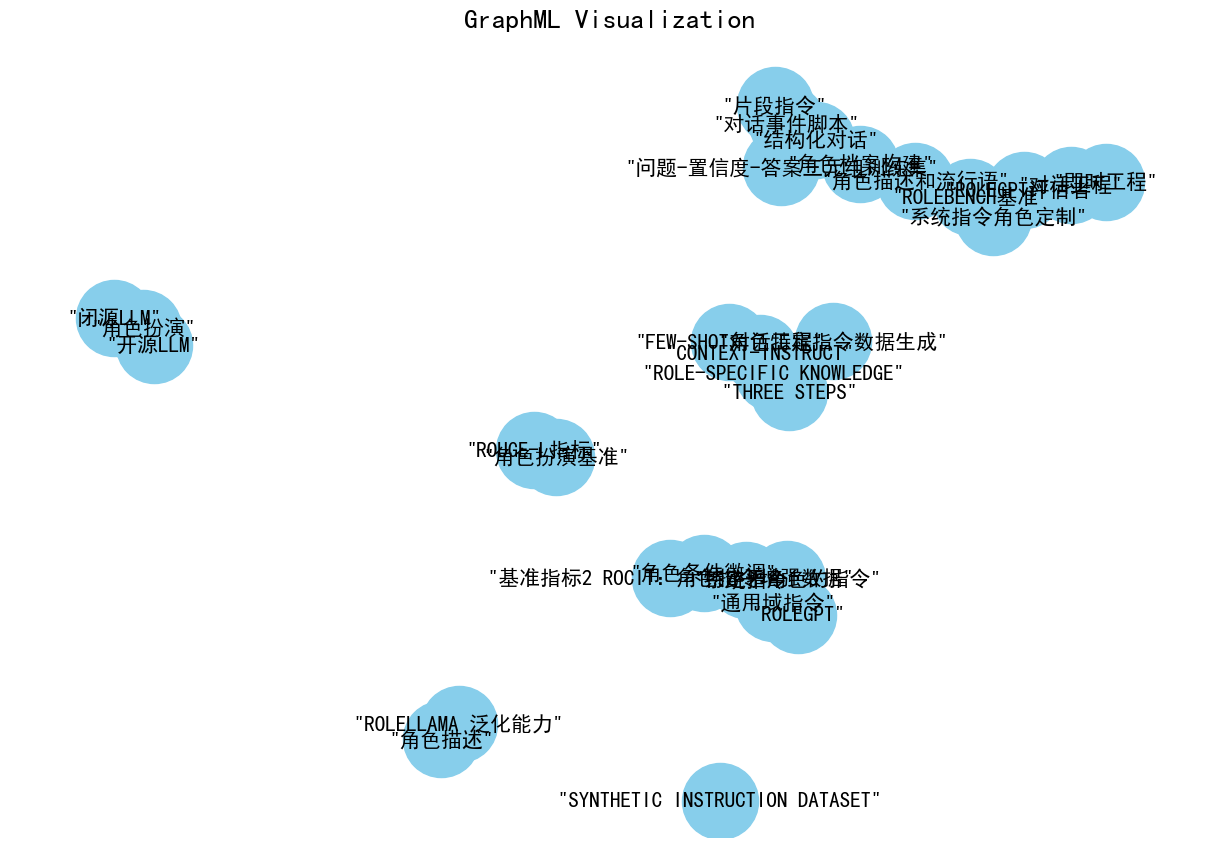

In [25]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_base_entity_graph_df['clustered_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()


In [27]:
create_base_extracted_entities_df = pd.read_parquet(f"{INPUT_DIR}/create_base_extracted_entities.parquet")
  
create_base_extracted_entities_df.head()

,entity_graph
0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


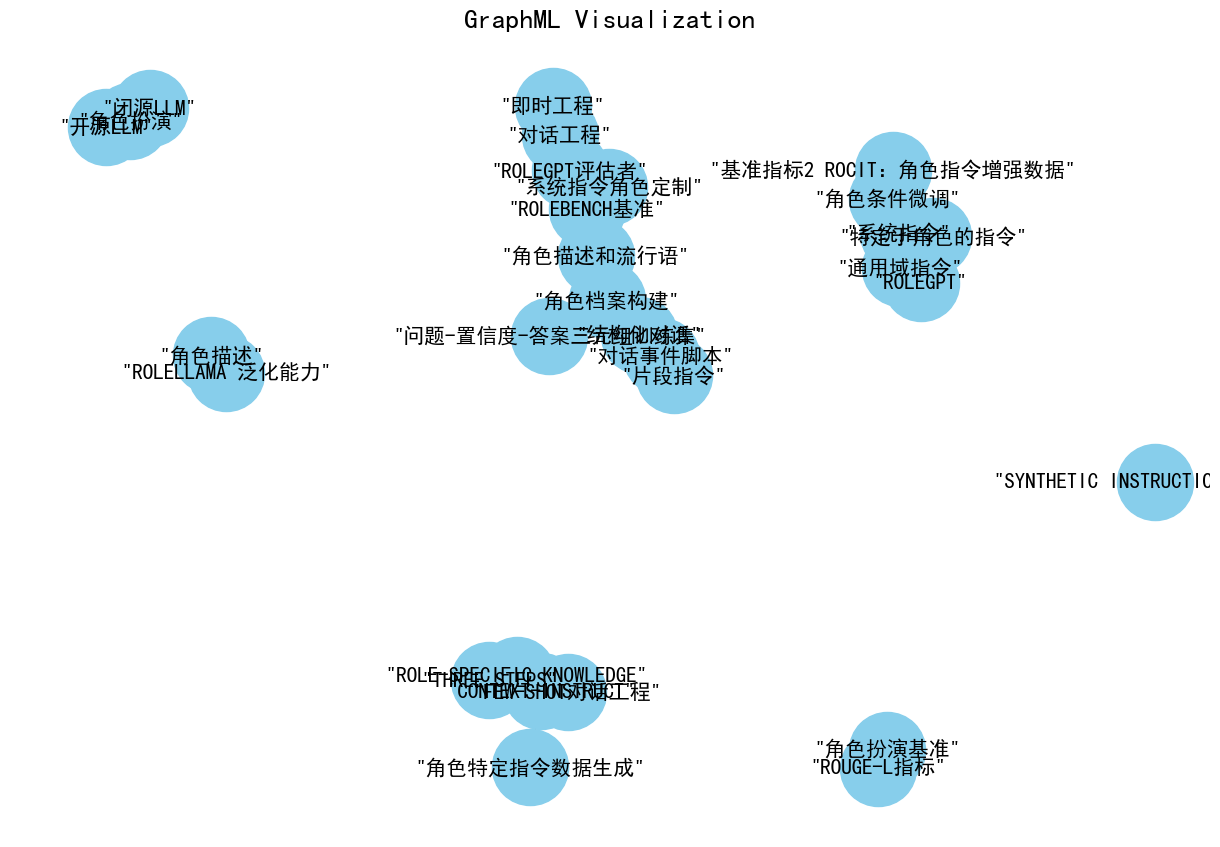

In [28]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_base_extracted_entities_df['entity_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()


In [29]:
create_summarized_entities_df = pd.read_parquet(f"{INPUT_DIR}/create_summarized_entities.parquet")
  
create_summarized_entities_df.head()

,entity_graph
0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


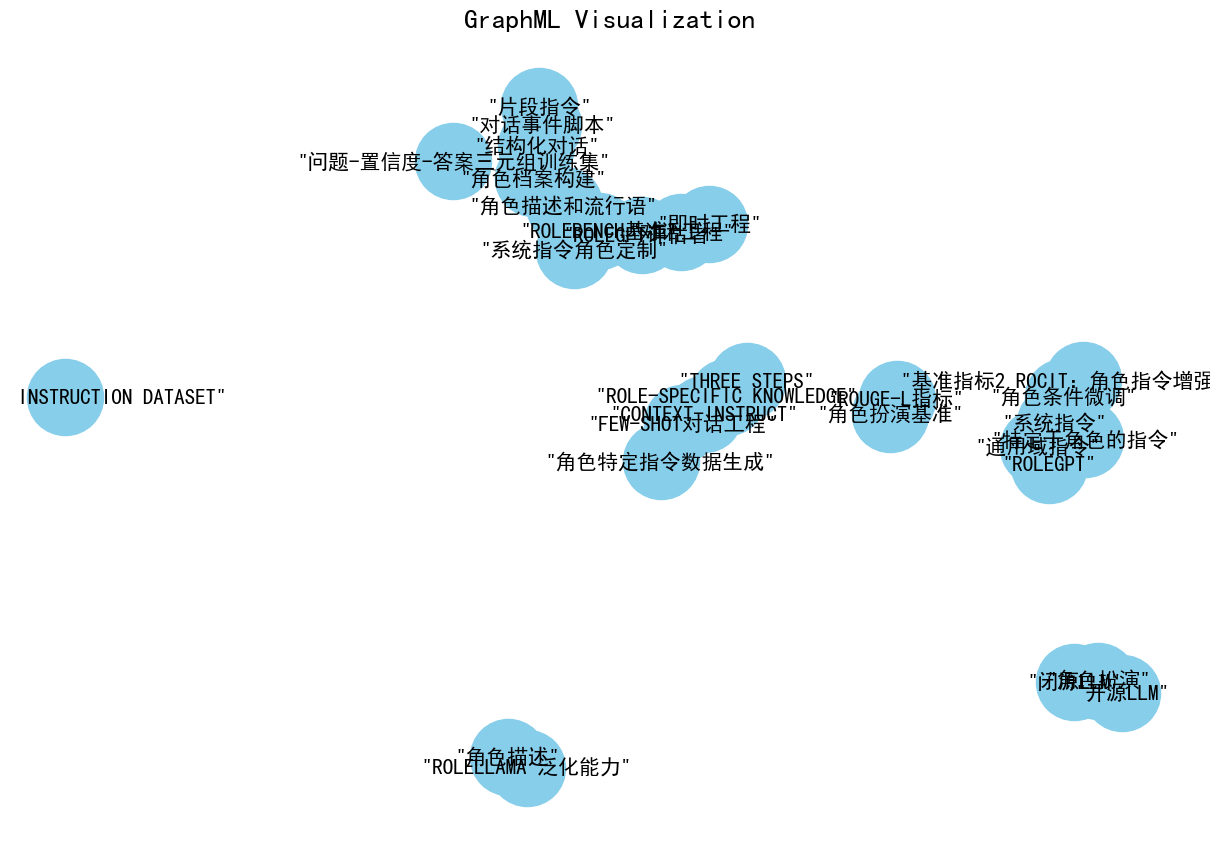

In [30]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_summarized_entities_df['entity_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()
